In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import re
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from matplotlib.font_manager import FontProperties
from numpy import amin, amax, ravel
import numpy.ma as ma

def get_eg_matrix(filename):
    A_set = set()
    B1_set = set()
    B2_set = set()
    X_set = set()
    value_eg = {}

    import re
    with open(filename,'r') as f:
        for line in f:
            compound = line.split()[0]
            if compound != 'None':
                eg = line.split()[1]  ##change here for 1->tolerance or 2->octahedron
                value_eg[compound] = eg
                A_set.add(re.split('1|2|6', compound)[0])
                B1_set.add(re.split('1|2|6', compound)[1])
                B2_set.add(re.split('1|2|6', compound)[2])
                X_set.add(re.split('1|2|6', compound)[3])  
    
    B1_list = ['Cu','Ag','Au','In','Tl']
    B2_list = ['Sc', 'Y', 'Al','Ga','In','Tl','As','Sb','Bi']

    import numpy as np
    eg = np.zeros( (len(B1_list), len(B2_list)) )
    number = 0
    for a in range(len(B1_list)):
        for b in range(len(B2_list)):
            compound = 'Cs'+'2'+B1_list[a]+'1'+B2_list[b]+'1'+'Cl'+'6'
            if compound in value_eg:
                eg[a][b] = value_eg[compound]
                number +=1
            else:
                eg[a][b] = 1000
    return eg

In [80]:
filename_eg = '/Users/yao/Google Drive/data/2116/data/Eg_result_SOC'
eg = get_eg_matrix(filename_eg)

import numpy.ma as ma
masked_eg = ma.masked_where(eg==1000, eg)

masked_eg[0:3, 2:6]

masked_array(data =
 [[-- -- 0.0 0.0]
 [2.2332 1.0008 1.0749 0.0]
 [0.4189 0.0 0.0 0.0]],
             mask =
 [[ True  True False False]
 [False False False False]
 [False False False False]],
       fill_value = 1e+20)

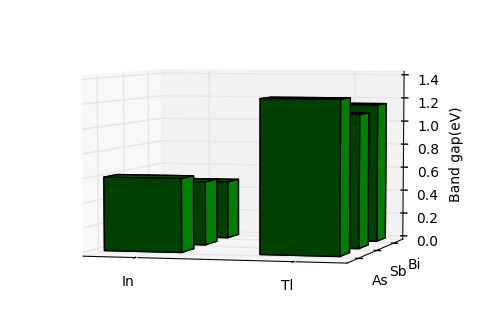

In [92]:
B1_list = ['Cu','Ag','Au', 'In','Tl']
B2_list = ['Sc', 'Y', 'Al','Ga','In','Tl', 'As','Sb','Bi']

B1 = B1_list[3:5]
B2 = B2_list[6:9]
dz = masked_eg[3:5, 6:9].flatten()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


xedges = np.arange(0, len(B1), 1)
yedges = np.arange(0, len(B2), 1)
xpos, ypos = np.meshgrid(xedges + 0.25, yedges + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g', zsort='average')
plt.xticks(xedges+0.5, B1)
plt.yticks(yedges+0.5, B2)
ax.set_zlabel('Band gap(eV)')
ax.view_init(elev=5,azim=-75)

plt.savefig("/Users/yao/Google Drive/data/2116/2116 figure/full_data/trend6.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [46]:
print(xpos)

[ 0.25  0.25  1.25  1.25  2.25  2.25]
